### High-Frequency Data Analysis and Market Microstructure

시장의 미시 구조적 특성에 대해 알아보고 분석해본다

#### 1. Price Sequences

**1.1 Tick Rules**

틱 규칙이란 거래에 있어서 공격적 거래자의 방향(aggressor side)을 결정하기 위한 알고리즘이다. 다음 논리에 따라서 매수가 주도한 거래는 1, 매도가 주도한 거래가 -1로 labeling을 한다

$$b_t = \begin{cases}
1, ~~ & \mbox{if } \Delta p_t > 0\\
-1, ~~ & \mbox{if } \Delta p_t < 0\\
0, ~~ & \mbox{if } \Delta p_t = 0
\end{cases}$$

여기서 $p_t$는 $t=1,\cdots, T$로 인덱스된 거래 가격이고, $b_0$은 임의로 1로 설정된다. 여러 연구를 통해 틱 규칙은 상대적으로 단순함에도 불구하고 높은 분류 정확도를 가진다.

$\{b_t\}$ 계열의 변환은 정보성 특성을 만들어낼 수 있다. 이런 변환에는 다음과 같은 것들이 있다.

1. 미래 기대값 $E_t[b_{t+1}]$에 대한 Kalman Filter
2. 이런 예측에 대한 구조적 변화
3. $\{b_t\}$ sequence의 Entropy
4. $\{b_t\}$ 런에 대한 Wald-Wolfowitz 테스트로부터의 t값
5. 누적 $\{b_t\}$계열 $\sum_{t=1}^t b_t$의 fractionallly diffrentiated features

**1.2 The Roll Model**

추세가 없는 Random walk를 따르는 중간 가격 계열 $\{m_t\}$를 고려해 보자
$$m_t = m_{t-1} + u_t$$

따라서 가격 변화 $\Delta m_t = m_t - m_{t-1}$는 다음의 정규 분포로부터 독립적이고 동일하게 추출된다

$$\Delta m_t \sim N(0, \sigma_u^2)$$

이러한 가정은 금융 시계열이 추세를 가지고, 이분산적이고, 상관관계를 보이고, 수익률 분포가 비정규 분포라는 모든 경험적 관찰에 상반된다. 관측된 가격 $\{p_t\}$는 매매 호가 스프레드에 대한 순차적 거래의 결과이다

$$p_t = m_t + b_tc$$

여기서 c는 매매 호가 스프레드의 절반이고 $b_t \in \{-1, 1\}$은 공격적 거래자의 방향이다. Roll model은 매수와 매도가 발생활 확률이 동일하고, 잡음으로부터의 독립이라고 가정한다. 이런 가정 하에서 롤은 $c$와 $\sigma_u^2$값을 다음과 같이 도출한다

$$\sigma^2[\Delta p_t] = E[(\Delta p_t)^2] - (E[\Delta p_t])^2 = 2c^2 + \sigma_u^2$$
$$\sigma[\Delta p_t, \Delta p_{t-1}] = -c^2$$

이는 $c = \sqrt{\max\{0, -\sigma[\Delta p_t, \Delta p_{t-1}] \}}$와 $\sigma_u^2 = \sigma^2[\Delta p_t] + 2\sigma[\Delta p_t, \Delta p_{t-1}]$의 결과를 갖게 한다. 결론적으로 매매 호가 스프레드는 가격 변화의 계열 공분산 함수이고, 미시 구조적 잡음을 제거한 참 가격의 잡음은 관측된 잡음과 가격 변화의 계열 공분산의 함수이다

**1.3 High-Low Volatility Estimator**

Parkinson(1980)은 기하 브라운 운동을 따르는 연속적으로 관측되는 가격에 대해 다음을 유도했다

$$E\Big[ \frac{1}{T} \sum_{t=1}^T \Big( \log\Big[\frac{H_t}{L_t}\Big]\Big)\Big] = k_1\sigma_{HL}^2$$
$$E\Big[ \frac{1}{T} \sum_{t=1}^T \Big( \log\Big[\frac{H_t}{L_t}\Big]\Big)\Big] = k_2\sigma_{HL}$$

여기서 $k_1 = 4\log(2), k_1 = \sqrt{\frac{8}{\pi}}$, $H_t$는 바 t에 대한 고가이고, $L_t$는 바 t에 대한 저가이다. 그러면 변동성 특성 $\sigma_{HL}$은 관측된 고가-저가에 기초해 안정적으로 계산 가능하다

**1.4 Corwin and Schultz**

Corwin, Schultz는 매매 호가 스프레드를 가격의 퍼센티지로 다음과 같이 계산할 수 있다는 것을 보였다

$$S_t = \frac{2(e^{\alpha_t}-1)}{1+e^{\alpha_t}}$$

여기서

$$\alpha_t = \frac{\sqrt{2\beta_t} - \sqrt{\beta_t}}{3 - 2\sqrt{2}} - \sqrt{\frac{\gamma_t}{3-2\sqrt{2}}}$$
$$\beta_t = E \Big[\sum_{j=0}^1 \Big[\log \Big(\frac{H_{t-j}}{L_{t-j}} \Big) \Big]^2\Big]$$
$$\gamma_t = \Big[\log \Big(\frac{H_{t-1, t}}{L_{t-1, t}}\Big) \Big]^2$$

$H_{t-1,t}$는 두 기간에 걸친 고가이고, $L_{t-1,t}$는 두 기간에 걸친 저가이다. Corwin-Schultz의 식에서는 변동성이 보이지 않는데, 이는 고가/저가 추정량으로 대체되었기 때문이다. 이 모델로써 벡커-파킨슨 변동성을 유도할 수 있다

#### example 1

Corwin & Schultz 알고리즘을 S&P500 futures 가격 시계열에 대해 적용해 보자

In [31]:
import matplotlib.pyplot as plt
import pandas as pd, numpy as np

def getBeta(series : pd.DataFrame, sl : int) :
    h1 = series[['High','Low']].values
    h1 = np.log(h1[:,0]/h1[:,1])**2
    h1 = pd.Series(h1, index = series.index)
    beta = h1.rolling(window = 2).sum()
    beta = beta.rolling(window = sl).mean()
    beta = beta.replace([np.inf, -np.inf], np.nan)
    return beta.dropna()

def getGamma(series : pd.DataFrame) :
    h2 = series['High'].rolling(window=2).max()
    l2 = series['Low'].rolling(window=2).min()
    gamma = np.log(h2.values/l2.values)**2
    gamma = pd.Series(gamma, index = h2.index)
    gamma = gamma.replace([np.inf, -np.inf], np.nan)
    return gamma.dropna()

def getAlpha(beta, gamma) :
    alpha = ((np.sqrt(2 * beta) - np.sqrt(beta)) /(3 - (2 * np.sqrt(2)))) - np.sqrt(gamma / (3 - (2 * np.sqrt(2))))
    alpha[alpha<0] = 0
    return alpha.dropna()

def corwinSchultz(series, sl : int = 1) :
    beta = getBeta(series, sl)
    gamma = getGamma(series)
    alpha = getAlpha(beta, gamma)
    spread = 2 * np.exp(alpha - 1)/(1 + np.exp(alpha))
    startTime = pd.Series(series.index[0 : spread.shape[0]], index = spread.index)
    spread = pd.concat([spread,startTime], axis = 1)
    spread.columns = ['Spread', 'Start_time']
    return spread

def getSigma(beta, gamma) :
    k2 = (8/np.pi)**.5
    den = 3-2*2**.5
    sigma = (2**-.5-1)*beta**.5/(k2*den)
    sigma += (gamma/(k2**2*den))**.5
    sigma[sigma<0] = 0
    return sigma

yfinance를 이용해 Apple의 일별 주가 데이터를 가져오도록 한다

In [32]:
import yfinance as yf

start_date = '2020-01-01'
end_date = '2023-08-01'

apple = yf.download('AAPL', start = start_date, end = end_date)
apple

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.249016,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.536903,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.114876,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.771027,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.941650,132079200
...,...,...,...,...,...,...
2023-07-25,193.330002,194.440002,192.919998,193.619995,193.358887,37283200
2023-07-26,193.669998,195.639999,193.320007,194.500000,194.237701,47471900
2023-07-27,196.020004,197.199997,192.550003,193.220001,192.959427,47460200


$\beta$는 주식 가격 변동성과 거래량 사이의 관계를 나타내는 지표이다. 거래량과 가격 변동성의 상관관계를 나타내므로, 상대 강도를 결정하는 데에 영향을 미치게 된다

In [33]:
getBeta(apple, 1)

Date
2020-01-03    0.000517
2020-01-06    0.000779
2020-01-07    0.000723
2020-01-08    0.000716
2020-01-09    0.000774
                ...   
2023-07-25    0.000250
2023-07-26    0.000204
2023-07-27    0.000712
2023-07-28    0.000732
2023-07-31    0.000202
Length: 899, dtype: float64

$\gamma$는 주식의 상대 강도(Spread)를 계산하는 데에 사용되는 또 다른 지표이다. 특정 윈도우 간의 고가와 저가 의 로그 차분값의 제곱으로 계산된다

In [34]:
getGamma(apple)

Date
2020-01-03    0.000330
2020-01-06    0.000697
2020-01-07    0.000754
2020-01-08    0.000586
2020-01-09    0.001909
                ...   
2023-07-25    0.000189
2023-07-26    0.000196
2023-07-27    0.000569
2023-07-28    0.000569
2023-07-31    0.000162
Length: 899, dtype: float64

$\alpha$는 주식의 가격 변동성과 거래량 사이의 관계를 조합하여 주식의 상대적인 강도를 나타내는 지표이다. $\alpha$가 음수인 경우, 주식의 가격 변동과 거래량 사이의 관계에서 상대적으로 약한 상태를 나타낸다

In [35]:
getAlpha(getBeta(apple, 1), getGamma(apple))

Date
2020-01-03    0.011028
2020-01-06    0.003648
2020-01-07    0.000000
2020-01-08    0.006189
2020-01-09    0.000000
                ...   
2023-07-25    0.005029
2023-07-26    0.000673
2023-07-27    0.006798
2023-07-28    0.007701
2023-07-31    0.003532
Length: 899, dtype: float64

<Axes: title={'center': 'Corwin-Schultz bid-ask spread'}, xlabel='Date'>

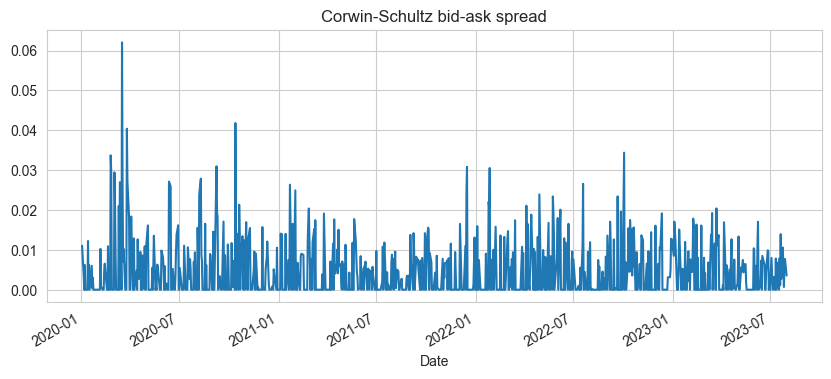

In [46]:
getAlpha(getBeta(apple, 1), getGamma(apple)).plot(figsize = (10,4), title = 'Corwin-Schultz bid-ask spread')

`corwinSchultz()` 함수는 spread의 상대 강도와 start time의 정보를 담는 pandas DataFrame 형태의 데이터를 출력한다

In [37]:
corwinSchultz(apple, sl = 1)

,Spread,Start_time
Date,,
2020-01-03,0.369908,2020-01-02
2020-01-06,0.368550,2020-01-03
2020-01-07,0.367879,2020-01-06
2020-01-08,0.369018,2020-01-07
2020-01-09,0.367879,2020-01-08
...,...,...
2023-07-25,0.368805,2023-07-24
2023-07-26,0.368003,2023-07-25
2023-07-27,0.369130,2023-07-26


$\sigma$는 고가/저가 추정량으로 대체된 벡커-파킨슨 변동성을 의미한다

<Axes: title={'center': 'Becker Parkinson Variance Estimator'}, xlabel='Date'>

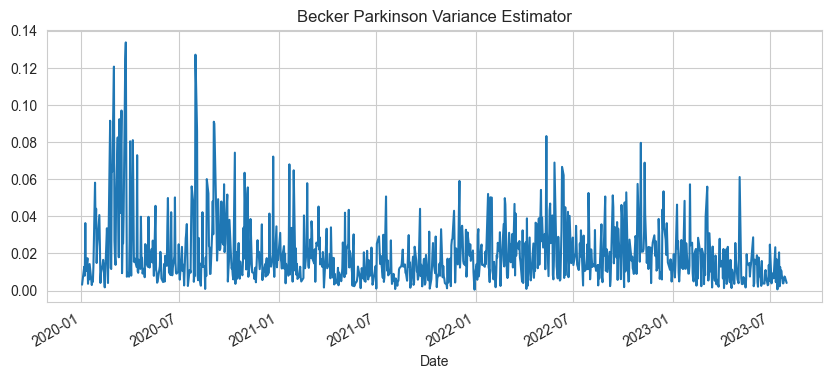

In [47]:
getSigma(getBeta(apple, 1), getGamma(apple)).plot(figsize = (10,4), title = 'Becker Parkinson Variance Estimator')

특성인 매매호가 스프레드는 rolling window에 걸쳐 반복적으로 계산한 후 Kalman Filter를 이용해 평활화가 가능하다

In [39]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

class LocalLinearTrend(sm.tsa.statespace.MLEModel):
    def __init__(self, endog):
        # Model order
        k_states = k_posdef = 2
        # Initialize the statespace
        super(LocalLinearTrend, self).__init__(
            endog, k_states=k_states, k_posdef=k_posdef,
            initialization="approximate_diffuse",
            loglikelihood_burn=k_states
        )
        # Initialize the matrices
        self.ssm['design'] = np.array([1, 0])
        self.ssm['transition'] = np.array([[1, 1],
                                           [0, 1]])
        self.ssm['selection'] = np.eye(k_states)
        # Cache some indices
        self._state_cov_idx = ("state_cov",) + np.diag_indices(k_posdef)

    @property
    def param_names(self):
        return ["sigma2.measurement", "sigma2.level", "sigma2.trend"]

    @property
    def start_params(self):
        return [np.std(self.endog)]*3

    def transform_params(self, unconstrained):
        return unconstrained**2

    def untransform_params(self, constrained):
        return constrained**0.5

    def update(self, params, *args, **kwargs):
        params = super(LocalLinearTrend, self).update(params, *args, **kwargs)
        # Observation covariance
        self.ssm['obs_cov',0,0] = params[0]
        # State covariance
        self.ssm[self._state_cov_idx] = params[1:]

In [42]:
spread = getAlpha(getBeta(apple, 1), getGamma(apple))
model = LocalLinearTrend(spread)
result = model.fit(disp = True)

print(result.summary())

/Users/tommylee/Desktop/Pycharm/QUANTIFI/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.92759D-01    |proj g|=  5.48601D+00

At iterate    1    f= -2.01675D+00    |proj g|=  1.62105D+01

At iterate    2    f= -2.17958D+00    |proj g|=  2.05554D+01
  ys=-4.884E-02  -gs= 1.519E-01 BFGS update SKIPPED

At iterate    3    f= -2.18128D+00    |proj g|=  2.05657D+01

At iterate    4    f= -2.72987D+00    |proj g|=  3.32102D+01

At iterate    5    f= -2.79479D+00    |proj g|=  3.57836D+01

At iterate    6    f= -3.11605D+00    |proj g|=  3.58591D+01

At iterate    7    f= -3.18865D+00    |proj g|=  4.39556D+01

At iterate    8    f= -3.21378D+00    |proj g|=  5.32437D+01

At iterate    9    f= -3.23094D+00    |proj g|=  2.04947D+01

At iterate   10    f= -3.25429D+00    |proj g|=  4.99372D+01

At iterate   11    f= -3.26137D+00    |proj g|=  5.08016D+01

At iterate   12    f= -3.28666D+00  

/Users/tommylee/Desktop/Pycharm/QUANTIFI/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


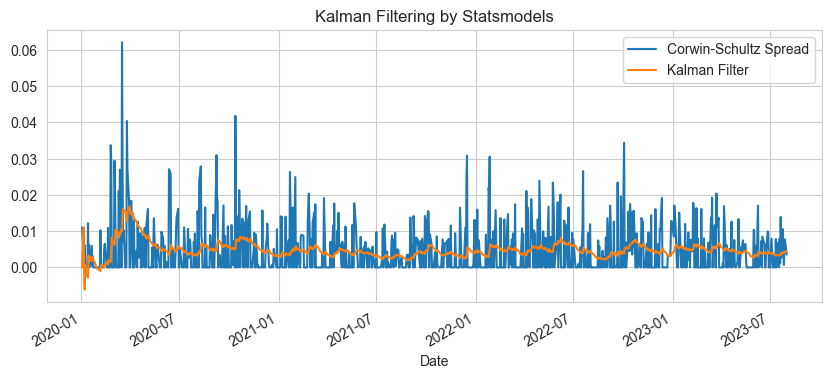

In [48]:
predict = ressult.get_prediction()
result = pd.DataFrame({"Corwin-Schultz Spread": spread,
                      "Kalman Filter": predict.predicted_mean})

result.plot(title = "Kalman Filtering by Statsmodels", figsize = (10, 4))
plt.show()

#### Exercise 1
IBM 주식 데이터를 yfinance를 통해 불러오라. 2020년 1월 1일부터 2023년 6월 30일까지의 데이터를 Corwin-Schultz 알고리즘을 이용해 Beta, Gamma, Alpha를 추정하라. 그후 벡커 파킨슨 변동성을 추정하라. $\mbox{GARCH}$를 이용해 추정한 변동성과 비교하라. 무엇이 다른가?

#### 2. Strategic Trade Models

전략적 거래 모델은 비유동성(illiquidity)의 이해와 측정에 집중한다. 비유동성은 프리미엄과 연관된 리스크이므로, 금융 모델링에 있어 중요한 정보성 특성이다. 이 모델은 거래를 정보 기반 거래자와 정보가 없는 거래자 사이의 사이의 전략적 상호작용으로 설명한다는 점에서 강력한 이론적 기반을 가지며, 이를 통해 거래량의 부호화 주문 흐름의 불균형에 주목한다. 이런 대부분의 측성은 회귀를 통해 추정된다

**2.1 Kyle's Lambda**

Kyle은 다음과 같은 전략적 거래 모델을 도입했다. 최종 가치가 $v ~\sim~ N(p_0, \Sigma_0)$인 위험성 자산과 다음 두 거래자를 고려해 본다
1. $v$와 독립적으로 $u = N(0, \sigma_u^2)$ 만큼의 수량을 거래하는 잡음 거래자
2. $v$를 알고 시장가 주문을 통해 수량 $x$를 원하는 정보 기반 거래자

시장 조성자들은 전체 주문 흐름 $y = x+u$를 관찰하고, 그에 해당하는 가격 $p$를 설정한다. 이 모형에서 시장 조성자들은 잡음 영역에 해당하는 거래자들의 주문과 정보 기반 거래자의 주문을 구분하지 못한다. 이들은 가격을 정보 기반 거래자의 존재를 나타낼 수 있는 주문 흐름 불균형의 함수로 조정한다. 그러므로 가격 변화와 주문 흐름의 불균형 사이에는 양의 관계가 있고, 이를 market impact라고 부른다.

**2.1.1 정보 기반 거래자들의 추측**

**정보 기반 거래자들**은 시장 조성자들이 선형 가격 조정 함수 $p = \lambda y+u$를 사용한다고 추정한다. 여기서 $\lambda$는 유동성 척도의 역수이다(즉 $\lambda$값이 높을수록 비유동적이다). 이 때, 정보기반 거래자들의 이윤 함수는 다음과 같다
$$\pi = (v - p)x$$

이윤함수의 Second Order Condition은 다음과 같다

$$\lambda > 0, ~~~ x = \frac{v-\mu}{2\lambda}$$

**2.1.2 시장 조성자들의 추측**

**시장 조성자들**은 정보 기반 거래자들의 소유가 $v$의 선형함수, 즉 $x = \alpha + \beta v$라고 추측하는데, 이는 다음을 의미한다.

$$\alpha = -\frac{\mu}{2\lambda}, ~~ \beta = \frac{1}{2\lambda}$$

더 낮은 유동성은 더 높은 $\lambda$값을 의미한다. 이는 정보 기반 거래자들이 거래를 더욱 기피한다는 것을 의미한다

**2.1.3 Kyle's Lambda**

Kyle은 시장 조성자가 수익 극대화와 시장 효율 사이의 균형을 반드시 찾아야 한다고 주장한다. 따라서 앞의 선형 함수하에서 유일한 해는 다음과 같을 때 발생한다

$$\mu = p_0$$
$$\alpha = p_0\sqrt{\frac{\sigma_u^2}{\Sigma_0}}$$
$$\lambda = \frac{1}{2} \sqrt{\frac{\Sigma_0}{\sigma_u^2}}$$
$$\beta = \sqrt{\frac{\sigma_u^2}{\Sigma_0}}$$

정보 기반 거래자의 기대 수익(Expected Return)은 다음과 같이 다시 쓸 수 있다

$$E[\pi] = \frac{(v-p_0)^2}{2}\sqrt{\frac{\sigma_u^2}{\Sigma_0}} = \frac{1}{4\lambda}(v-p_0)^2$$

이는 정보 기반 거래자는 세 가지 종류의 수익 원천이 있다는 것을 암시한다

1. 자산의 가격 오류
2. 잡음 투자가의 순주문 흐름 분산. 즉, 잡음 투자가들(개미)이 많을수록 정보 기반 거래자들이 자신의 의도를 감추기가 쉬워진다
3. 최종 증권 분산의 역수, 변동성이 낮을수록 가격 오류로부터의 수익을 얻기 쉬워진다

카일의 모형에서 변수 $\lambda$는 가격 충격을 포착한다. 비유동성은 $v$의 불확실성과 함께 증가하고, 잡음의 양에 따라 감소한다. $\lambda$는 하나의 측성으로 다음과 같은 회귀를 적합화하여 구할 수 있다

$$\Delta p_t = \lambda(b_t V_t) + \epsilon_t$$

여기서 $\{p_t\}$는 가격 시계열, $\{b_t\}$는 공격적 거래자 플래그의 시계열, $\{V_t\}$는 거래량 시계열이므로 $\{b_tV_t\}$는 거래량의 부호 또는 순주문 흐름의 시계열이 된다.

#### exmaple 2

S&P500 future series에 대하여 일별 Kyle's lambda를 추정하고 histogram을 출력하라

In [10]:
future = pd.read_parquet('clean_IVE_fut_prices.parq')
future.columns = ['Price','bid','ask','size','Volume','Dollar Value']
future['side'] = np.nan
future.loc[future['Price'] > future['bid'], 'side'] = 1
future.loc[future['Price'] < future['ask'], 'side'] = -1
future['diff price'] = future["Price"].diff()
future = future.groupby(future.index).sum()
future = future.dropna()
future

,Price,bid,ask,size,Volume,Dollar Value,side,diff price
dates,,,,,,,,
2009-09-28 09:30:00,101.50,101.40,101.58,738,738,37431.98,0.0,-0.08
2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00,-1.0,0.04
2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00,1.0,0.00
2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00,-1.0,0.00
2009-09-28 09:31:51,50.75,50.74,50.76,300,300,15225.00,-1.0,0.00
...,...,...,...,...,...,...,...,...
2018-10-05 15:59:57,116.20,116.18,116.20,200,200,23240.00,1.0,0.00
2018-10-05 15:59:59,1045.78,1045.60,1045.71,9493,9493,1103077.60,9.0,0.00
2018-10-05 16:00:00,116.22,116.20,116.21,42884,42884,4983978.48,1.0,0.02


Kyle's lambda를 추정하기 위해서는 Net Order Flow(순주문 흐름)을 계산해야 한다

In [11]:
def NetOrderFlow(series : pd.DataFrame) -> pd.Series :
    price_diff = series['diff price']
    net_order_flow = price_diff * series['Volume']
    return net_order_flow

In [12]:
future['Net order flow'] = NetOrderFlow(future)
future

,Price,bid,ask,size,Volume,Dollar Value,side,diff price,Net order flow
dates,,,,,,,,,
2009-09-28 09:30:00,101.50,101.40,101.58,738,738,37431.98,0.0,-0.08,-59.04
2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00,-1.0,0.04,4.00
2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00,1.0,0.00,0.00
2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00,-1.0,0.00,0.00
2009-09-28 09:31:51,50.75,50.74,50.76,300,300,15225.00,-1.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...
2018-10-05 15:59:57,116.20,116.18,116.20,200,200,23240.00,1.0,0.00,0.00
2018-10-05 15:59:59,1045.78,1045.60,1045.71,9493,9493,1103077.60,9.0,0.00,0.00
2018-10-05 16:00:00,116.22,116.20,116.21,42884,42884,4983978.48,1.0,0.02,857.68


`DataFrame`의 `groupby()` method를 통해 일별로 loop을 돌릴 수 있다

In [14]:
import statsmodels.api as sm
Kyle = []
for _, i in future.groupby(future.index.date) :
    X = i['Net order flow']
    y = i['diff price']
    model = sm.OLS(y,X)
    result = model.fit()
    Kyle.append(result.params[0])

<Axes: ylabel='Count'>

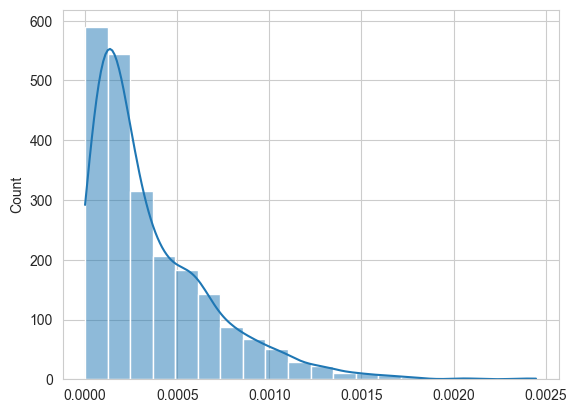

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(Kyle, kde = True, bins = 20)

**2.2 Amihud's Lambda**

Amihud(2002)는 절대 수익률과 비유동성 사이의 양의 관계를 연구했다. 그는 거래량의 1달러에 연관된 일별 가격 반응을 계산한 값이 가격 충격의 대리 척도라고 주장했다. 이 아이디어를 구현하는 방법 중 하나는 다음과 같다

$$|\Delta \log [\tilde p_\tau]| = \lambda \sum_{t \in B_tau}(p_tV_t) + \epsilon_\tau$$

여기서 $B_\tau$는 바 $\tau$에 포함된 거래 집합이고, $\tilde p_\tau$는 바 $\tau$의 종가이다. 또한, $p_tV_t$는 거래 $t \in B_\tau$에 관여된 달러 거래량이다.

#### example 3

S&P500 future series에 대하여 일별 Amihud lambda를 추정하고 histogram을 출력하라

Amihud Lambda를 추정하기 위해서는 Dollar Volume과 log difference price를 사용해야 한다

In [16]:
future['log diff'] = np.log(future['Price']).diff()
future = future.dropna()
future

,Price,bid,ask,size,Volume,Dollar Value,side,diff price,Net order flow,log diff
dates,,,,,,,,,,
2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00,-1.0,0.04,4.00,-0.693147
2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00,1.0,0.00,0.00,0.000000
2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00,-1.0,0.00,0.00,0.000000
2009-09-28 09:31:51,50.75,50.74,50.76,300,300,15225.00,-1.0,0.00,0.00,0.000000
2009-09-28 09:32:06,152.34,152.28,152.34,900,900,45702.00,3.0,0.03,27.00,1.099203
...,...,...,...,...,...,...,...,...,...,...
2018-10-05 15:59:57,116.20,116.18,116.20,200,200,23240.00,1.0,0.00,0.00,0.000000
2018-10-05 15:59:59,1045.78,1045.60,1045.71,9493,9493,1103077.60,9.0,0.00,0.00,2.197205
2018-10-05 16:00:00,116.22,116.20,116.21,42884,42884,4983978.48,1.0,0.02,857.68,-2.197033


In [17]:
Amihud = []
for _, i in future.groupby(future.index.date) :
    X = i['Dollar Value']
    y = i['log diff'].abs()
    model = sm.OLS(y,X)
    result = model.fit()
    Amihud.append(result.params[0])

<Axes: ylabel='Count'>

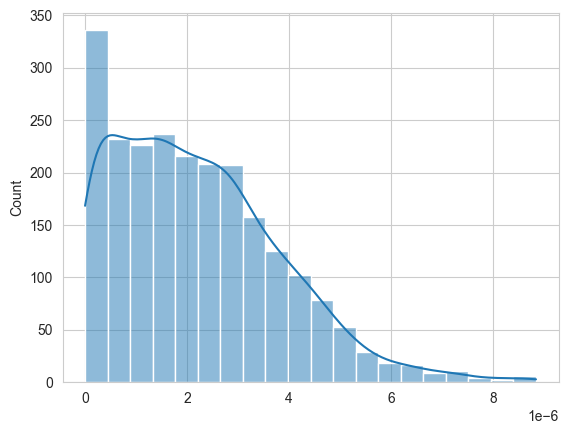

In [18]:
sns.histplot(Amihud, kde = True, bins = 20)

**2.3 Hasbrouk's Lambda**

Hasbrouk은 Kyle과 Amihud의 아이디어를 따랐고, 이들은 일중 거래와 호가 데이터(Trade and Quote)에 기반을 둔 가격 충격 계수를 계산하는데 적용했다. Hasbrouk은 Gibbs sampler를 사용해 아래 회귀식의 Bayes 추정을 수행하였다

$$\log[\tilde p_{i,\tau}] - \log[\tilde p_{i,\tau-1}] = \lambda_i \sum_{t \in B_{i,\tau}}\Big( b_{i,t} \sqrt{p_{i,t}V_{i,t}}\Big) + \epsilon_{i,\tau}$$

$B_{i,\tau}$는 증권 $i$에 대한 바 $\tau$에 속한 거래 집합이다. 여기서 $i = 1,\cdots,I$이고, $\tilde p_{i,\tau}$는 증권 $i$의 바 $\tau$의 종가이며, $b_{i,t} \in \{-1, 1\}$은 거래 $t \in B_{i,\tau}$ 매수자 개시인지 매도자 개시인지 알려 준다. $p_{i,t}V_{i,t}$는 거래 $t \in B_{i,\tau}$에 관련된 달러 거래량이다. 다음 모든 증권 $i$에 대해 $\lambda_i$를 계산하고 이를 거래의 유효 비용을 근사하는 특성으로 사용한다

#### 3. Sequential Trade Models

**3.1 Probaility of Informed Trading models**

이슬리 등은 거래 데이터를 사용해 개별 증권의 정보 기반 거래 확률을 계산한다. 해당 미시 구조 모델은 거래를 시장 조성자와 포지션을 취하는 거래자 간에 여러 번의 거래 주기에 걸쳐 반복되는 게임으로 봤다

증권의 $S$, 현재 가격을 $S_0$로 표기하자. 특정 양의 새로운 정보가 가격 $S$에 포함되면 $S$는 $S_B$ 또는 $S_G$가 된다. 분석 중인 시간 프레임 내에 새로운 정보가 도달할 확률은 $\alpha$이거, 그 뉴스가 나쁜 뉴스일 확률은 $\delta$, 뉴스가 좋은 뉴스일 확률은 $(1-\delta)$이다. 이 저자들은 시점 $t$에서의 증권 가격 기대값은 다음과 같이 계산할 수 있다는 것을 증명했다

$$E[S_t] = (1-\alpha_t)S_0 + \alpha_t [\delta_tS_B+(1-\delta_t)S_G]$$

정보 기반 거래자들은 푸아송 분포를 따라 $\mu$비율로 등장하고, 잡음 거래자들은 $\epsilon$비율로 등장한다면 시장 조성자들은 정보 기반 거래자로부터의 손실을 피하고자 손익 분기 매수 호가 수준을 $B_t$로 설정한다

$$E[B_t] = E[S_t] - \frac{\mu \alpha_t \delta_t}{\epsilon + \mu \alpha_t \delta_t}(E[S_t] - S_B)$$

그리고 시각 $t$에서의 손익 분기 매도 호가 수준 $A_t$는 다음과 같다

$$E[A_t] = E[S_t] + \frac{\mu \alpha_t (1-\delta_t)}{\epsilon +\mu \alpha_t (1-\delta_t)}(S_G - E[S_t])$$

이에 따라 손익 분기 매매 호가 스프레드는 다음과 같이 결정된다

$$E[A_t - B_t] = \frac{\mu \alpha_t (1-\delta_t)}{\epsilon + \mu \alpha_t (1-\delta_t)}(S_G - E[S_t]) + \frac{\mu \alpha_t \delta_t}{\epsilon + \mu\alpha_t \delta_t}(E[S_t] - S_B)$$

$\delta_t = \frac{1}{2}$인 경우에 다음을 얻게 된다

$$\delta_t = \frac{1}{2} \Rightarrow E[A_t - B_t] = \frac{\alpha_t \mu}{\alpha_t \mu + 2\epsilon}(S_G - S_B)$$

이 식은 시장 조성자들이 유동성을 공급하는 가격의 범위를 결정하는 주요한 요인이 다음과 같다는 것을 말해 준다

$$\mathrm{PIN}_t = \frac{\alpha_t \mu}{\alpha_t \mu + 2\epsilon}$$